# Ambient Tracer Concentrations from SalishSeaCast Climatology
Trying to make a good approximation of ambient concentrations of the tracers in the Salish Sea - this will make looking at whatever the input from the Pacific is easier to discern. <br>
Average over all years (as annual and monthly)

In [1]:
from pathlib import Path
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# for mapping
import warnings
warnings.simplefilter('ignore')

# for CSs
import scipy.interpolate as interp
from matplotlib.patches import Rectangle
from cmocean import cm
from matplotlib.collections import PatchCollection


In [2]:
path = Path("/results/SalishSea/month-avg.201905/")
tracers =xr.open_mfdataset(sorted(path.glob(f"SalishSea_1m_201*_ptrc_T.nc"))) 
#lets say the 2010s are fine FOR NOW, 2009 is the year with a funky thing in it, wirte this later st it only skips 2009

# tracers = xr.open_mfdataset("/results/SalishSea/month-avg.201905/SalishSea_1m_*_ptrc_T.nc")

In [3]:
tracers = tracers.mean(dim= 'time_counter')

In [4]:
tracers

<xarray.Dataset>
Dimensions:                       (y: 898, x: 398, nvertex: 4, deptht: 40, axis_nbounds: 2)
Coordinates:
    nav_lat                       (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
    nav_lon                       (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
  * deptht                        (deptht) float32 0.5 1.5 2.5 ... 414.5 441.5
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables: (12/15)
    bounds_lon                    (y, x, nvertex) float32 dask.array<chunksize=(898, 398, 4), meta=np.ndarray>
    bounds_lat                    (y, x, nvertex) float32 dask.array<chunksize=(898, 398, 4), meta=np.ndarray>
    area                          (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
    deptht_bounds                 (deptht, axis_nbounds) float32 dask.array<chunksize=(40, 2), meta=np.ndarray>
    nitrate                       (deptht, y, x) float32 dask.array<chunksize=(40, 898, 398), meta=np.ndarray>
    ammonium                      (deptht, y, x) float32 dask.array<chunksize=(40, 898, 398), meta=np.ndarray>
    ...                            ...
    ciliates                      (deptht, y, x) float32 dask.array<chunksize=(40, 898, 398), meta=np.ndarray>
    microzooplankton              (deptht, y, x) float32 dask.array<chunksize=(40, 898, 398), meta=np.ndarray>
    dissolved_organic_nitrogen    (deptht, y, x) float32 dask.array<chunksize=(40, 898, 398), meta=np.ndarray>
    particulate_organic_nitrogen  (deptht, y, x) float32 dask.array<chunksize=(40, 898, 398), meta=np.ndarray>
    biogenic_silicon              (deptht, y, x) float32 dask.array<chunksize=(40, 898, 398), meta=np.ndarray>
    mesozooplankton               (deptht, y, x) float32 dask.array<chunksize=(40, 898, 398), meta=np.ndarray>

In [5]:
# Load grid
grid = xr.open_dataset('/data/bmoorema/MEOPAR/grid/bathymetry_201702.nc', mask_and_scale=False)
mask = xr.open_dataset('/data/bmoorema/MEOPAR/grid/mesh_mask201702.nc')

#### I think it makes sense to take the average over a hole region of boxes within the domain - thinking Haro strait region victoria sill onwards before actually entering SoG or Puget

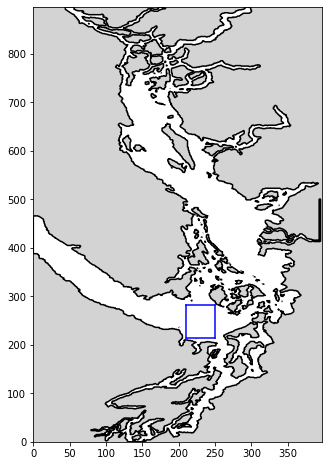

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.contourf(mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
ax.set_aspect(4/6)

ax.plot([210,210],[283,215], c='b')
ax.plot([250,250],[283,215], c='b')
ax.plot([210,250],[283,283], c='b')
ax.plot([210,250],[215,215], c='b')

In [7]:
weight = mask.e3t_1d[0,:]
weight = weight.rename({'z': 'deptht'})
weight.name = "weights"
# weight

In [8]:
x = tracers.silicon[:,215:284,210:251]
x = x.where(x > 0)
x_weighted = x.weighted(weight)
x_sil = x_weighted.mean(skipna=True)
x_sil = x_sil.values
print("the ambient silicon concentration in the region is "+str(float(x_sil))+" mmol/m3")

the ambient silicon concentration in the region is 38.56021985814748 mmol/m3


In [9]:
x = tracers.nitrate[:,215:284,210:251]
x = x.where(x > 0)
x_weighted = x.weighted(weight)
x_nit = x_weighted.mean(skipna=True)
x_nit = x_nit.values
print("the ambient nitrate concentration in the region is "+str(float(x_nit))+" mmol/m3")

the ambient nitrate concentration in the region is 23.786778708795662 mmol/m3


In [10]:
# now to get it for salinity, carbon, and temperature

In [11]:
tracers =xr.open_mfdataset(sorted(path.glob(f"SalishSea_1m_201*_grid_T.nc"))) 
tracers = tracers.mean(dim= 'time_counter')

In [12]:
x = tracers.votemper[:,215:284,210:251]
x = x.where(x > 0)
x_weighted = x.weighted(weight)
x_temp = x_weighted.mean(skipna=True)
x_temp = x_temp.values
print("the ambient temperature in the region is "+str(float(x_temp))+" degC")

the ambient temperature in the region is 8.852269152037495 degC


In [13]:
x = tracers.vosaline[:,215:284,210:251]
x = x.where(x > 0)
x_weighted = x.weighted(weight)
x_sal = x_weighted.mean(skipna=True)
x_sal= x_sal.values
print("the ambient salinity in the region is "+str(float(x_sal))+" g/kg")

the ambient salinity in the region is 31.60275942234613 g/kg


In [14]:
tracers =xr.open_mfdataset(sorted(path.glob(f"SalishSea_1m_201*_carp_T.nc"))) 
tracers = tracers.mean(dim= 'time_counter')

In [15]:
x =tracers.dissolved_inorganic_carbon[:,215:284,210:251]
x = x.where(x > 0)
x_weighted = x.weighted(weight)
x_car = x_weighted.mean(skipna=True)
x_car = x_car.values
print("the ambient DIC concentration in the region is "+str(float(x_car))+" mmol/m3")

the ambient DIC concentration in the region is 2118.0746131918677 mmol/m3


# ok now plot tracer cross sections!

In [16]:
mymesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
depthf = interp.interp1d(mymesh.z, mymesh.gdept_1d)

In [17]:
def draw_patches(fmask, lonW, lonE, t_dist, t_depths): #draw ground part of cross section
    topo = []
    for i in range(lonW,lonE):
        for j in range(39):
            if fmask[j, i] == 0:
                rect = Rectangle((t_dist[i], t_depths[j]), t_dist[i+1]-t_dist[i], t_depths[j+1]-t_depths[j])
                topo.append(rect)
    pc = PatchCollection(topo, facecolors='lightgray', zorder=3)
    return(pc)

In [40]:
# make mask mesh to show the proper bathymetry
months = ['jan','mar','may','jul','sep','nov']
files = ['/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_1hr/forward_01'+month+'18/ariane_positions_quantitative.nc' for month in months]

tran = np.array([])
depth = np.array([])
lon = np.array([])
for file in files:
    data = xr.open_dataset(file)
    tran = np.append(tran, data.init_transp)
    depth = np.append(depth, depthf(data.init_z-1.)[0])
    lon = np.append(lon, data.init_lon)
    
figrid = 377
lonW = 18
lonE = 63
maxdepth = 300

igrid = figrid-1
fmask = mymesh.fmask[0, :, igrid]
tmask = mymesh.tmask[0]
nav_lon = mymesh.nav_lon[igrid]
    
f_lons = mymesh.glamf[0, igrid]
u_lons = mymesh.glamv[0, igrid]
m2lon = ((u_lons[lonE]-u_lons[lonW])/(mymesh.e2f[0, igrid, lonW:lonE].sum())).values
f_dist = f_lons/m2lon
w_depths = mymesh.gdepw_1d
    
dist = lon/m2lon
      
H, xedges, yedges = np.histogram2d(dist, depth, bins=[np.array(f_dist[lonW-1:lonE]), w_depths[0]],weights= tran)

H = np.where(H!=0,H,1)
Hmesh = np.where(H==1,H,np.nan)

Xmesh, Ymesh = np.meshgrid(xedges[:-1], yedges[:-1])

In [46]:
def JRTracerFluxCS_delta(tracername, lonW, lonE, figrid, maxdepth, ax):
    igrid = figrid-1
    fmask = mymesh.fmask[0, :, igrid]
    tmask = mymesh.tmask[0]
    nav_lon = mymesh.nav_lon[igrid]
    time = 720
    
    lons = mydata.init_lon[(mydata.final_section != 0)]
#     lats = mydata.init_lat[(mydata.final_section != 0)]
    
    f_lons = mymesh.glamf[0, igrid]
    u_lons = mymesh.glamv[0, igrid]
    w_depths = mymesh.gdepw_1d
    
    m2lon = ((u_lons[lonE]-u_lons[lonW])/(mymesh.e2f[0, igrid, lonW:lonE].sum()))
    f_dist = f_lons/m2lon
    
#     t_depths = mymesh.gdept_1d[0,:]
    
    xs, ys = np.meshgrid(np.array(f_dist), np.array(w_depths[0]))
    
    dist = lons/m2lon
    depths = depthf(mydata.init_z[(mydata.final_section != 0)]-1.)[0]
    transports = mydata.init_transp[(mydata.final_section != 0)]/time
    
    amC = x_car #mmol/m3
    amSi = x_sil #mmol/m3
    amSa = x_sal #g/kg
    amN = x_nit #mmol/m3
    amT = x_temp #deg C
    
    if tracername == 'salt' or tracername == 'silicon':
        tracer = mydata.init_salt[(mydata.final_section != 0)]
        if tracername == 'salt':
            t_max = 6 #1.2
            units = 'g kg-1 m s-1'
            tracer -= amSa
        else:
            t_max = 20 #3
            units = 'mmol m-2 s-1'
            tracer -= amSi
    elif tracername == 'temp' or tracername == 'nitrate' or tracername == 'carbon':
        tracer = mydata.init_temp[(mydata.final_section != 0)]
        if tracername == 'nitrate':
            t_max = 20 #3
            units = 'mmol m-2 s-1'
            tracer -= amN #
        elif tracername == 'temp':
            t_max = 5 #1.2
            units = '$^\circ C$'
            tracer -= amT
        else:
            t_max = 400 #80?        
            units = 'mmol m-2 s-1'
            tracer -= amC
    else:
        print('incorrect tracer name, options are salt, temp, silicon, carbon, nitrate')

    cmap = cm.balance
    weight = tracer*transports           
#     H, xedges, yedges, im = ax.hist2d(dist, depths, bins=[np.array(f_dist[lonW-1:lonE]), w_depths[0]],weights= weight, cmap=cmap, vmin=-t_max, vmax=t_max, density= True)
    H, xedges, yedges, im = ax.hist2d(dist, depths, bins=[np.array(f_dist[lonW-1:lonE]), w_depths[0]], weights=weight)
    X, Y = np.meshgrid(xedges, yedges)
    dx = xedges[1] - xedges[0]
    dy = yedges[1] - yedges[0]
    
#     H_final = H.T * float(sum(transports))
    H_final = H.T/(dx*dy)
    np.nan_to_num(H_final, nan=0, copy=False)
    
    # try to get rid of the lines
    h= H_final
    h[:,11] = H_final[:,11]/2.6
    h[:,19] = H_final[:,19]/2.5
    h[:,27] = H_final[:,27]/1.5
    h[:,36] = H_final[:,36]/2

    im = ax.pcolormesh(X, Y, h, vmax = t_max, vmin = -t_max, cmap=cmap)
    cb1 = fig.colorbar(im, ax=ax)
    cb1.set_ticks([-t_max, t_max])
    cb1.set_ticklabels([-t_max, t_max]) 
    cb1.set_label(units, labelpad=-15)
    
    pc = draw_patches(fmask, lonW-2, lonE, np.array(f_dist), np.array(w_depths[0]))
    ax.add_collection(pc)
    ax.contourf(Xmesh, Ymesh, Hmesh.T, [0.99, 1.01], colors='lightgray', zorder=3)

    ax.invert_yaxis()
    ax.set_xticks([f_dist[lonW+1], f_dist[lonE-1]])
    ax.set_xticklabels(["USA", "Canada"])
    ax.set_xlim((f_dist[lonW-2], f_dist[lonE]))
    ax.set_ylim((maxdepth, 0))
    mydata.close()
    
#     return h

In [47]:
def JRTracerFluxCS_deltaWinter(tracername, lonW, lonE, figrid, maxdepth, ax):
    igrid = figrid-1
    fmask = mymesh.fmask[0, :, igrid]
    tmask = mymesh.tmask[0]
    nav_lon = mymesh.nav_lon[igrid]
    time = 720
    
    lons = mydata.init_lon[(mydata.final_section != 0)]
    
    f_lons = mymesh.glamf[0, igrid]
    u_lons = mymesh.glamv[0, igrid]
    w_depths = mymesh.gdepw_1d
    
    m2lon = ((u_lons[lonE]-u_lons[lonW])/(mymesh.e2f[0, igrid, lonW:lonE].sum()))
    f_dist = f_lons/m2lon
    
    xs, ys = np.meshgrid(np.array(f_dist), np.array(w_depths[0]))
    
    dist = lons/m2lon
    depths = depthf(mydata.init_z[(mydata.final_section != 0)]-1.)[0]
    transports = mydata.init_transp[(mydata.final_section != 0)]/time
    
    amC = x_car #mmol/m3
    amSi = x_sil #mmol/m3
    amSa = x_sal #g/kg
    amN = x_nit #mmol/m3
    amT = x_temp #deg C
    
    if tracername == 'salt' or tracername == 'silicon':
        tracer = mydata.init_salt[(mydata.final_section != 0)]
        if tracername == 'salt':
            t_max = 1.2
            units = 'g kg-1 m s-1'
            tracer -= amSa
        else:
            t_max = 3
            units = 'mmol m-2 s-1'
            tracer -= amSi
    elif tracername == 'temp' or tracername == 'nitrate' or tracername == 'carbon':
        tracer = mydata.init_temp[(mydata.final_section != 0)]
        if tracername == 'nitrate':
            t_max = 3
            units = 'mmol m-2 s-1'
            tracer -= amN #
        elif tracername == 'temp':
            t_max = 1
            units = '$^\circ C$'
            tracer -= amT
        else:
            t_max = 80     
            units = 'mmol m-2 s-1'
            tracer -= amC
    else:
        print('incorrect tracer name, options are salt, temp, silicon, carbon, nitrate')

    cmap = cm.diff
    weight = tracer*transports           
#     H, xedges, yedges, im = ax.hist2d(dist, depths, bins=[np.array(f_dist[lonW-1:lonE]), w_depths[0]],weights= weight, cmap=cmap, vmin=-t_max, vmax=t_max, density= True)
    H, xedges, yedges, im = ax.hist2d(dist, depths, bins=[np.array(f_dist[lonW-1:lonE]), w_depths[0]], weights=weight)
    X, Y = np.meshgrid(xedges, yedges)
    dx = xedges[1] - xedges[0]
    dy = yedges[1] - yedges[0]
    
#     H_final = H.T * float(sum(transports))
    H_final = H.T/(dx*dy)
    np.nan_to_num(H_final, nan=0, copy=False)
    
    # try to get rid of the lines
    h= H_final
    h[:,11] = H_final[:,11]/2.6
    h[:,19] = H_final[:,19]/2.5
    h[:,27] = H_final[:,27]/1.5
    h[:,36] = H_final[:,36]/2

    im = ax.pcolormesh(X, Y, h, vmax = t_max, vmin = -t_max, cmap=cmap)
    cb1 = fig.colorbar(im, ax=ax)
    cb1.set_ticks([-t_max, t_max])
    cb1.set_ticklabels([-t_max, t_max]) 
    cb1.set_label(units, labelpad=-15)
    
    pc = draw_patches(fmask, lonW-2, lonE, np.array(f_dist), np.array(w_depths[0]))
    ax.add_collection(pc)
    ax.contourf(Xmesh, Ymesh, Hmesh.T, [0.99, 1.01], colors='lightgray', zorder=3)

    ax.invert_yaxis()
    ax.set_xticks([f_dist[lonW+1], f_dist[lonE-1]])
    ax.set_xticklabels(["USA", "Canada"])
    ax.set_xlim((f_dist[lonW-2], f_dist[lonE]))
    ax.set_ylim((maxdepth, 0))
    mydata.close()
    
#     return X, Y

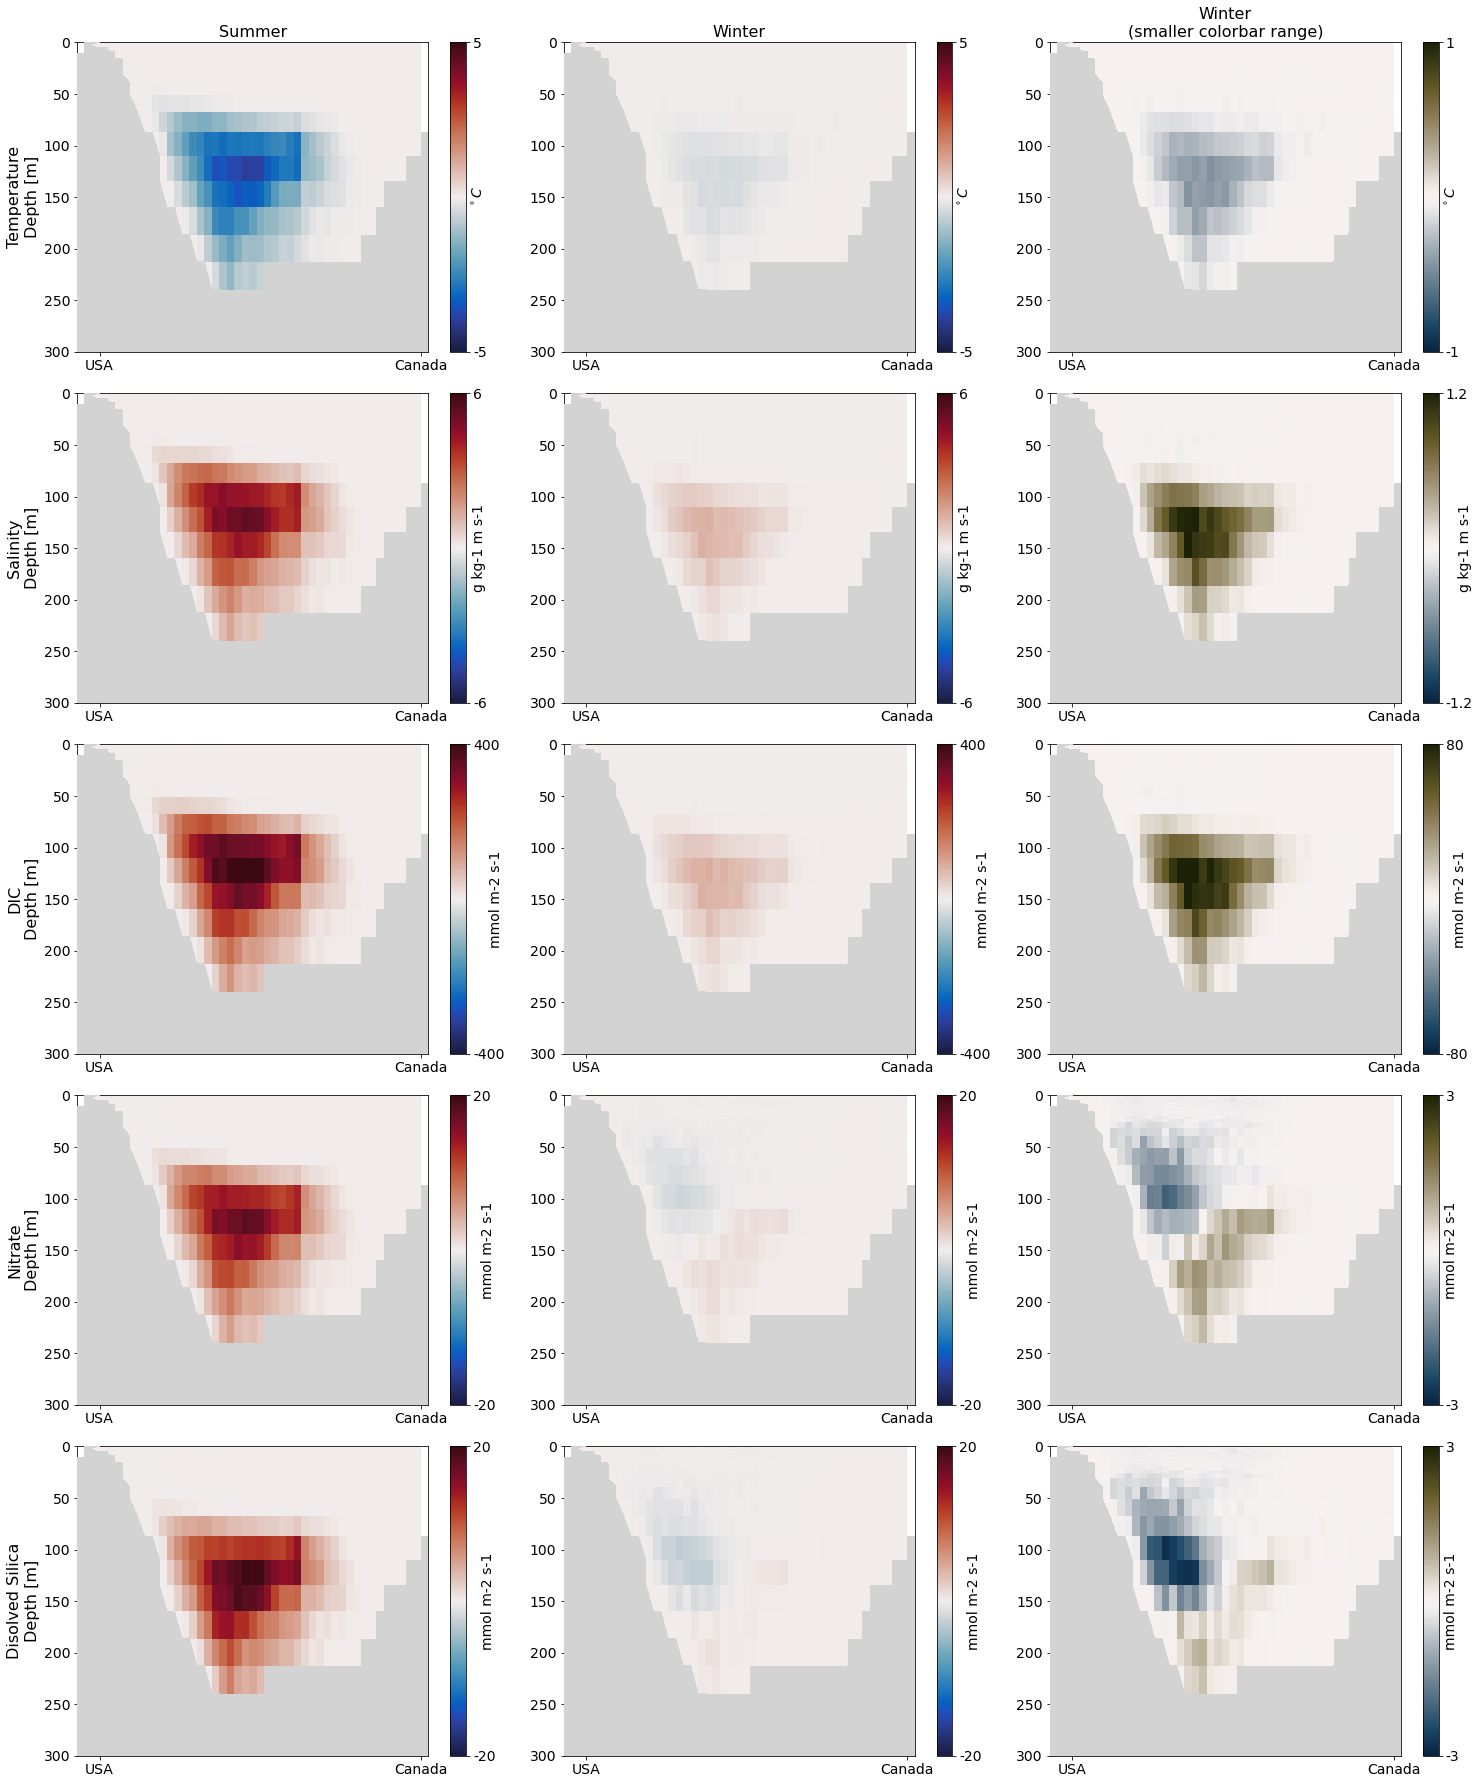

In [49]:
# now plt january and may for the nutrient tracers
plt.rcParams['font.size'] = 14
str_mo = ['may', 'jan']
fig, ax = plt.subplots(5, 3, figsize = (21, 25))

for i in range(len(str_mo)):
    file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_1hr/forward_01'+str_mo[i]+'18/ariane_positions_quantitative.nc'
    mydata = xr.open_dataset(file)

    tracername = 'temp'
    JRTracerFluxCS_delta(tracername, 18, 63, 377, 300, ax[0,i])
     
    file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_Car_Sal/forward_01'+str_mo[i]+'18/ariane_positions_quantitative.nc'
    mydata = xr.open_dataset(file)

    tracername = 'salt'
    JRTracerFluxCS_delta(tracername, 18, 63, 377, 300, ax[1,i])

    tracername = 'carbon'
    JRTracerFluxCS_delta(tracername, 18, 63, 377, 300, ax[2,i])   

# file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_1hr/forward_01jan18/ariane_positions_quantitative.nc'

tracername = 'salt'
JRTracerFluxCS_deltaWinter(tracername, 18, 63, 377, 300, ax[1,2])

tracername = 'carbon'
JRTracerFluxCS_deltaWinter(tracername, 18, 63, 377, 300, ax[2,2]) 

file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_1hr/forward_01'+str_mo[i]+'18/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)

tracername = 'temp'
JRTracerFluxCS_deltaWinter(tracername, 18, 63, 377, 300, ax[0,2])

for i in range(len(str_mo)):

    file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_Nit_Sil/forward_01'+str_mo[i]+'18/ariane_positions_quantitative.nc'
    mydata = xr.open_dataset(file)

    tracername = 'nitrate'
    JRTracerFluxCS_delta(tracername, 18, 63, 377, 300, ax[3,i])

    tracername = 'silicon'
    JRTracerFluxCS_delta(tracername, 18, 63, 377, 300, ax[4,i])

tracername = 'nitrate'
JRTracerFluxCS_deltaWinter(tracername, 18, 63, 377, 300, ax[3,2])

tracername = 'silicon'
JRTracerFluxCS_deltaWinter(tracername, 18, 63, 377, 300, ax[4,2])  
    
ax[0,0].set_title('Summer', fontsize=16)
ax[0,1].set_title('Winter', fontsize=16)
ax[0,2].set_title('Winter\n(smaller colorbar range)', fontsize=16)
ax[0,0].set_ylabel('Temperature\nDepth [m]', fontsize=16)
ax[1,0].set_ylabel('Salinity\nDepth [m]', fontsize=16)
ax[2,0].set_ylabel('DIC\nDepth [m]', fontsize=16)
ax[3,0].set_ylabel('Nitrate\nDepth [m]', fontsize=16)
ax[4,0].set_ylabel('Disolved Silica\nDepth [m]', fontsize=16)

plt.tight_layout()
plt.savefig("./figures/JDF_CS.pdf")